In [11]:
import numpy as np
# import matplotlib.pyplot as plt
import mujoco 
# import mujoco.viewer
import time
# import desired_kinematic as dsk
# import compute_activation as ca
# import force_length_velocity_functions as flv
import get_activations
import plot_functions

In [ ]:

path_to_model = "../Working_Folder/tendon_quadruped_ws_inair.xml"

activation_folder = "../activation_data_files" 

for omega in np.round(np.arange(0.01, 1.21, 0.01),2):  # Increment omega from 0.1 to 1.2 (inclusive)
    try: 
        activation_file, desired_qpos, desired_qvel, desired_qacc = get_activations.compute_and_save_activations(
            path_to_model, 
            omega, 
            dt=0.005, 
            duration_in_seconds=10,
            activation_folder=activation_folder)

        muscle_activations = np.loadtxt(activation_file)
        print(f"Simulated omega: {omega}, Activation file: {activation_file}")

    except Exception as e:
        print(f"An error occurred while simulating omega {omega}: {e}")
        continue


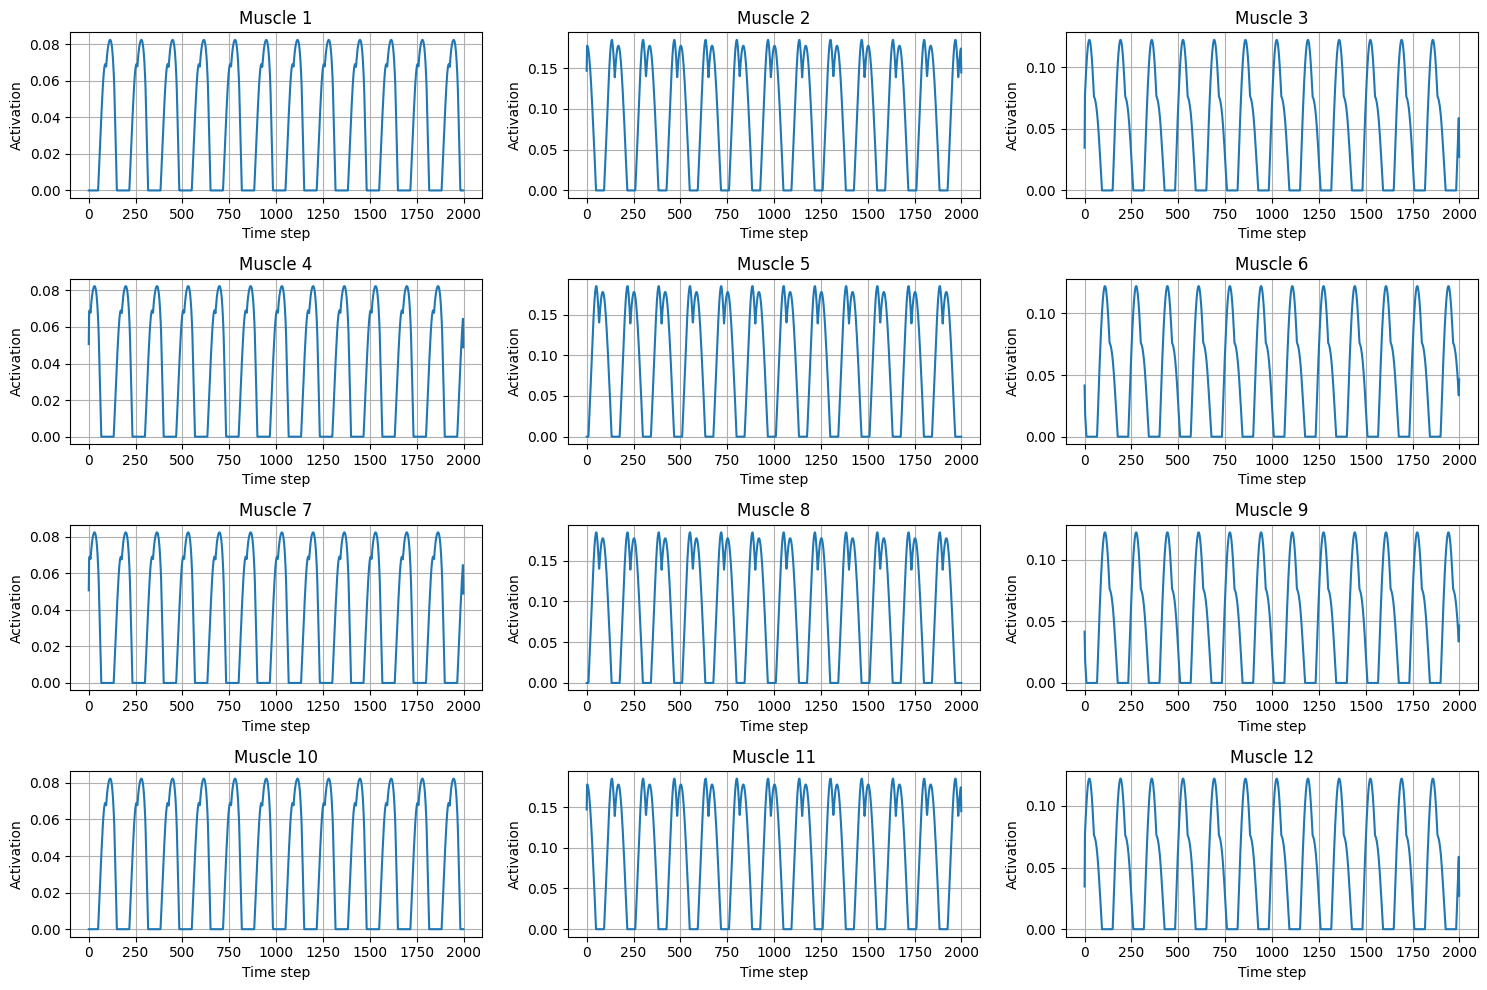

In [53]:
plot_functions.plot_muscle_activations(muscle_activations)

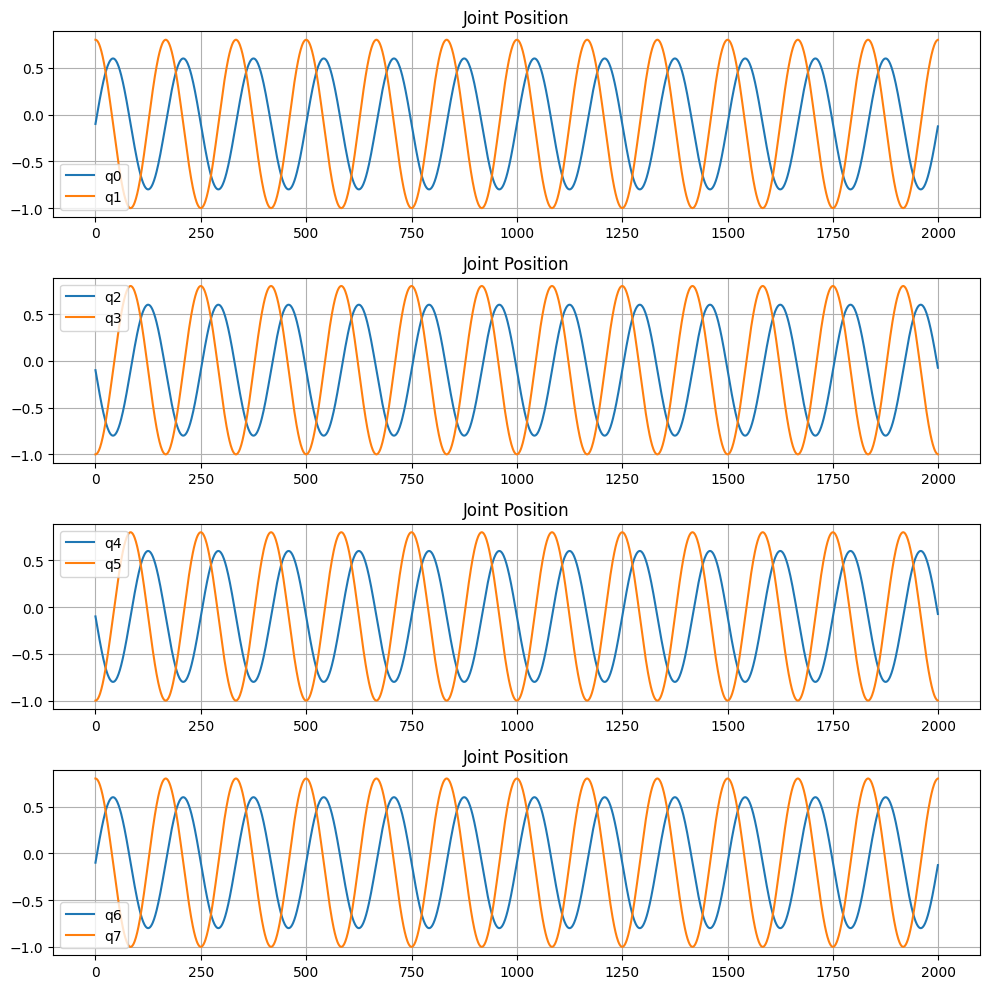

In [61]:
plot_functions.plot_joint_state(desired_qpos)

### Run simulation of quadruped in air 

In [16]:
model = mujoco.MjModel.from_xml_path(path_to_model)
data = mujoco.MjData(model)

n_steps = muscle_activations.shape[0]
num_joints = len(model.dof_jntid)
attempted_qpos = np.zeros((n_steps, num_joints))
attempted_qvel = np.zeros((n_steps, num_joints))
attempted_qacc = np.zeros((n_steps, num_joints))
idx = 0
wait_time = 0.5

idx = 0
wait_time = 0.5

with mujoco.viewer.launch_passive(model, data, show_left_ui=False, show_right_ui=True) as viewer:

    for idx in range(n_steps):
        step_start = time.time()
        data.ctrl[:] = muscle_activations[idx,:] * 100
        mujoco.mj_step(model, data)
        attempted_qpos[idx,:] = data.qpos
        attempted_qvel[idx,:] = data.qvel
        attempted_qacc[idx,:] = data.qacc
        viewer.sync()
    

        time_until_next_step = model.opt.timestep - (time.time() - step_start)
        if time_until_next_step > 0:
            time.sleep(time_until_next_step)

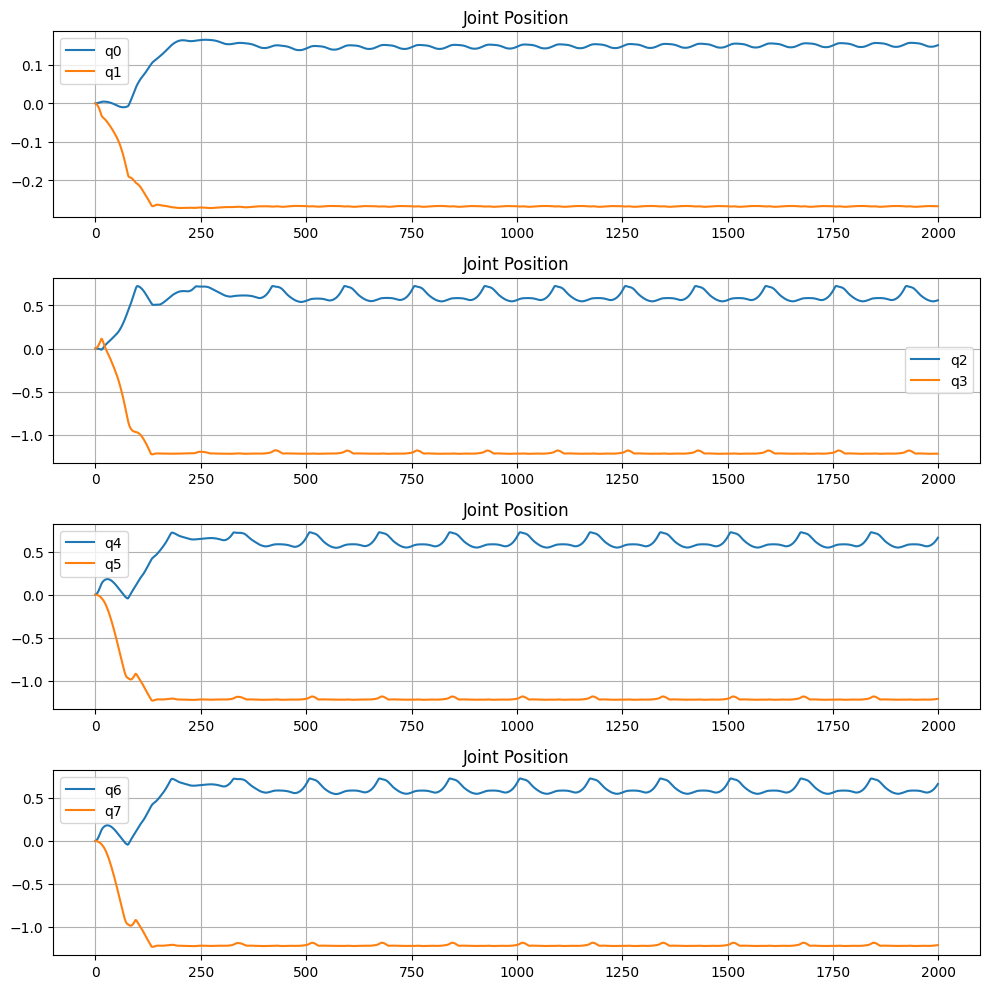

In [55]:
plot_functions.plot_joint_state(attempted_qpos)

### Run simulation with quadruped on the ground model

In [68]:
path_to_model = "../Working_Folder/tendon_quadruped_ws_inair.xml"

model = mujoco.MjModel.from_xml_path(path_to_model)
data = mujoco.MjData(model)

n_steps = muscle_activations.shape[0]
num_joints = len(model.dof_jntid)
attempted_qpos = np.zeros((n_steps, num_joints))
attempted_qvel = np.zeros((n_steps, num_joints))
attempted_qacc = np.zeros((n_steps, num_joints))
idx = 0
wait_time = 0.5


idx = 0
wait_time = 0.5

with mujoco.viewer.launch_passive(model, data, show_left_ui=False, show_right_ui=True) as viewer:

    for idx in range(n_steps):
        step_start = time.time()
        data.ctrl[:] = muscle_activations[idx,:] * 100
        mujoco.mj_step(model, data)
        attempted_qpos[idx,:] = data.qpos
        attempted_qvel[idx,:] = data.qvel
        attempted_qacc[idx,:] = data.qacc
        viewer.sync()
    

        time_until_next_step = model.opt.timestep - (time.time() - step_start)
        if time_until_next_step > 0:
            time.sleep(time_until_next_step)